In [1]:
import os

In [2]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
d = '../data/data_folds/'
os.listdir(d)

['data_test_0.xlsx',
 'data_test_1.xlsx',
 'data_test_2.xlsx',
 'data_test_3.xlsx',
 'data_test_4.xlsx',
 'data_test_5.xlsx',
 'data_test_6.xlsx',
 'data_test_7.xlsx',
 'data_test_8.xlsx',
 'data_test_9.xlsx',
 'data_test_A229RX0_0.xlsx',
 'data_test_A229RX0_1.xlsx',
 'data_test_A229RX0_2.xlsx',
 'data_test_A229RX0_3.xlsx',
 'data_test_A229RX0_4.xlsx',
 'data_test_A229RX0_5.xlsx',
 'data_test_A229RX0_6.xlsx',
 'data_test_A229RX0_7.xlsx',
 'data_test_A229RX0_8.xlsx',
 'data_test_A229RX0_9.xlsx',
 'data_test_AAA_0.xlsx',
 'data_test_AAA_1.xlsx',
 'data_test_AAA_2.xlsx',
 'data_test_AAA_3.xlsx',
 'data_test_AAA_4.xlsx',
 'data_test_AAA_5.xlsx',
 'data_test_AAA_6.xlsx',
 'data_test_AAA_7.xlsx',
 'data_test_AAA_8.xlsx',
 'data_test_AAA_9.xlsx',
 'data_test_AIRRTMFMD11_0.xlsx',
 'data_test_AIRRTMFMD11_1.xlsx',
 'data_test_AIRRTMFMD11_2.xlsx',
 'data_test_AIRRTMFMD11_3.xlsx',
 'data_test_AIRRTMFMD11_4.xlsx',
 'data_test_AIRRTMFMD11_5.xlsx',
 'data_test_AIRRTMFMD11_6.xlsx',
 'data_test_AIRRTMF

In [4]:
os.chdir('../')
os.listdir('./')

['.env',
 '.git',
 '.gitignore',
 '.idea',
 'data',
 'LICENSE',
 'macro',
 'notebooks',
 'pp.png',
 'pyproject.toml',
 'r',
 'README.md',
 'setup.cfg']

In [5]:
dd = './data/data_folds/data_{0}_{1}_{2}.xlsx'
dd

'./data/data_folds/data_{0}_{1}_{2}.xlsx'

In [6]:
# features_selected = ['GS20__pct_shift1', 'PCU4841214841212__stayer_percentile', 'RBUSBIS__median1x6_div_pct', 'T20YIEM__pct_shift1']
features_selected = ['MRTSSM44112USN__std1x12_div_pct', 'PCU4841214841212__max3x6_div_pct', 'RBUSBIS__mean1x3_div_pct', 'T10YIEM__max1x3_div_pct', 'USEPUINDXM__predictors_arima_auto', 'USTRADE__std1x12_div_pct']
features_selected

['MRTSSM44112USN__std1x12_div_pct',
 'PCU4841214841212__max3x6_div_pct',
 'RBUSBIS__mean1x3_div_pct',
 'T10YIEM__max1x3_div_pct',
 'USEPUINDXM__predictors_arima_auto',
 'USTRADE__std1x12_div_pct']

In [425]:
def load_data(j, target):
    role = 'train'
    data_train = []
    for c in features_selected:
        feature_base = c.split('__')[0]
        data_slice = pandas.read_excel(dd.format(role, feature_base, j))
        data_slice = data_slice.rename(columns={'Unnamed: 0': 'date'})
        data_slice['date'] = pandas.to_datetime(data_slice['date'])
        data_slice = data_slice.set_index('date')
        data_train.append(data_slice[c].copy())
    data_train = pandas.concat(data_train, axis=1, ignore_index=False)
    data_train = data_train.iloc[:-1, :].copy()
    data_train[target] = data_slice.loc[data_slice.index[1:], target].values

    role = 'test'
    data_test = []
    for c in features_selected:
        feature_base = c.split('__')[0]
        data_slice = pandas.read_excel(dd.format(role, feature_base, j))
        data_slice = data_slice.rename(columns={'Unnamed: 0': 'date'})
        data_slice['date'] = pandas.to_datetime(data_slice['date'])
        data_slice = data_slice.set_index('date')
        data_test.append(data_slice[c].copy())
    data_test = pandas.concat(data_test, axis=1, ignore_index=False)
    data_test = data_test.iloc[:-1, :].copy()
    data_test[target] = data_slice.loc[data_slice.index[1:], target].values

    return data_train, data_test

In [830]:
j = 8
target = "IVV_aggmean_pct"
data_train, data_test = load_data(j, target)
feature = features_selected[1]
feature

'PCU4841214841212__max3x6_div_pct'

In [831]:
# data_train

In [832]:
# data_test

In [833]:
# len(features_selected)

[Text(0.5, 0, 'MRTSSM44112USN__std1x12_div_pct'),
 Text(1.5, 0, 'PCU4841214841212__max3x6_div_pct'),
 Text(2.5, 0, 'RBUSBIS__mean1x3_div_pct'),
 Text(3.5, 0, 'T10YIEM__max1x3_div_pct'),
 Text(4.5, 0, 'USEPUINDXM__predictors_arima_auto'),
 Text(5.5, 0, 'USTRADE__std1x12_div_pct'),
 Text(6.5, 0, 'IVV_aggmean_pct')]

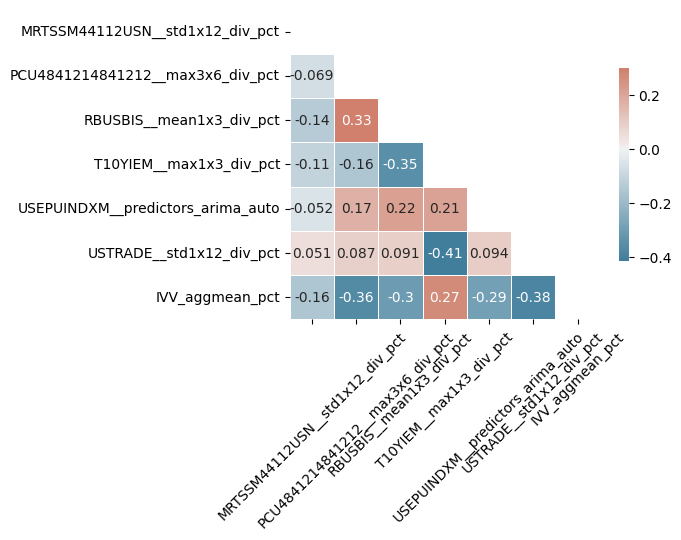

In [834]:
corr = data_train.corr()
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))
fig, ax = pyplot.subplots(figsize=(5, 5))
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)
seaborn.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    annot=True,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# ?

C:\Users\Edward\AppData\Local\Temp\ipykernel_18056\1445197121.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=30)
C:\Users\Edward\AppData\Local\Temp\ipykernel_18056\1445197121.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=30)


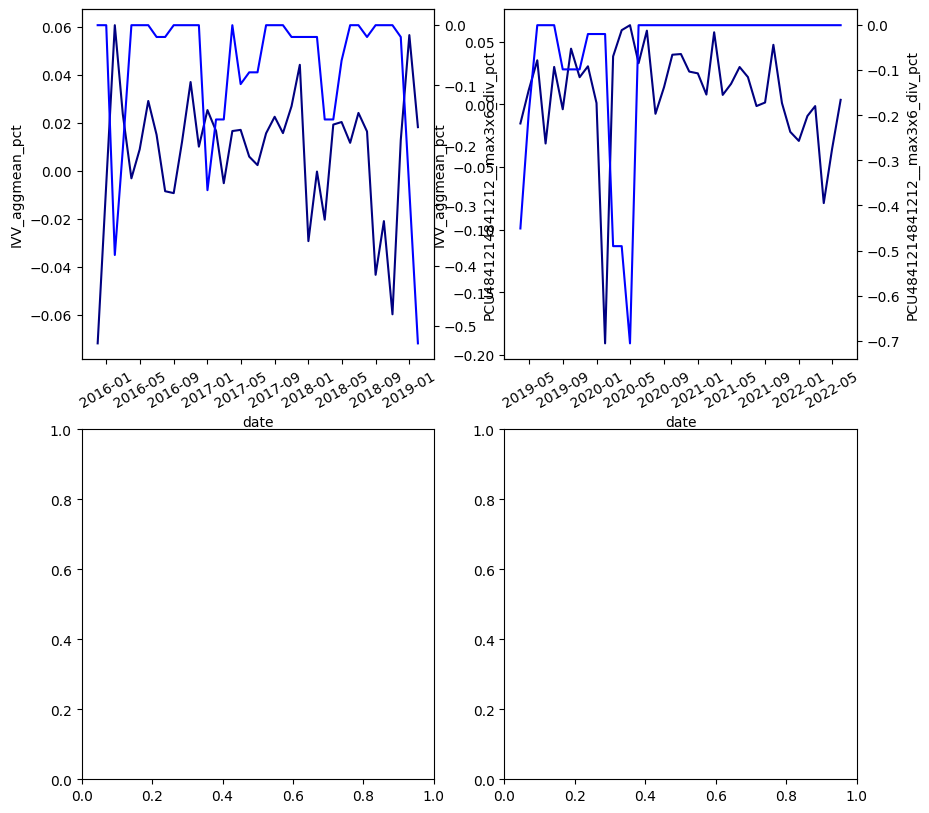

In [835]:
fig, ax = pyplot.subplots(2, 2, figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=data_train[target],
    color='navy', 
    ax=ax[0, 0]
)
seaborn.lineplot(
    x=data_train.index, 
    y=data_train[feature],
    color='blue', 
    ax=ax[0, 0].twinx()
)
seaborn.lineplot(
    x=data_test.index, 
    y=data_test[target],
    color='navy', 
    ax=ax[0, 1]
)
seaborn.lineplot(
    x=data_test.index, 
    y=data_test[feature],
    color='blue', 
    ax=ax[0, 1].twinx()
)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=30)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=30)
# ax.set_ylim([30_000, 50_000])
print()

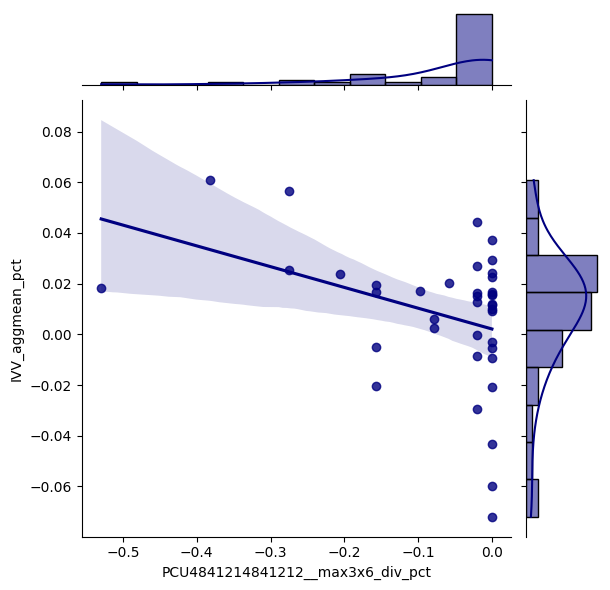

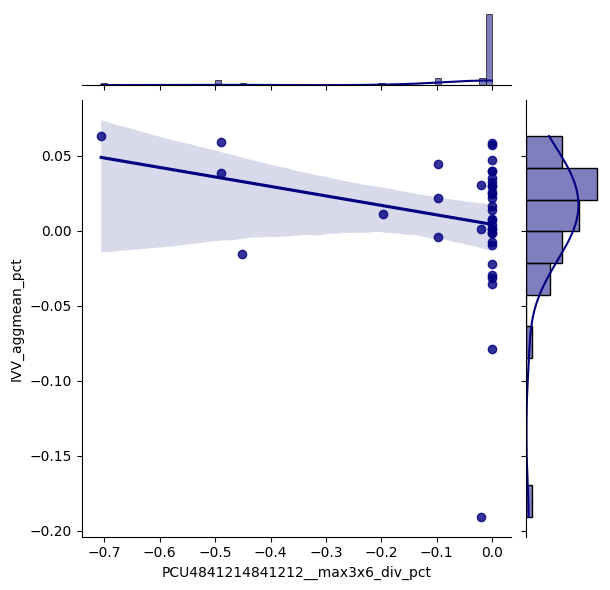

In [836]:
seaborn.jointplot(
    x=data_train[feature], 
    y=data_train[target],
    color='navy', 
    kind='reg',
)
seaborn.jointplot(
    x=data_test[feature], 
    y=data_test[target],
    color='navy', 
    kind='reg',
)
print()

In [808]:
target

'IVV_aggmean_pct'

In [929]:
j = 9
data_train, data_test = load_data(j, target)

In [930]:
"""
# features_selected = ['GS20__pct_shift1', 'PCU4841214841212__stayer_percentile', 'RBUSBIS__median1x6_div_pct', 'T20YIEM__pct_shift1']
# features_selected = ['GS20__pct_shift1', 'RBUSBIS__median1x6_div_pct']
# features_selected = ['RBUSBIS__median1x6_div_pct', 'T20YIEM__pct_shift1']
features_selected = ['GS20__pct_shift1', 'PCU4841214841212__stayer_percentile', 'RBUSBIS__median1x6_div_pct']
"""
# features_selected = ['MRTSSM44112USN__std1x12_div_pct', 'PCU4841214841212__max3x6_div_pct', 'RBUSBIS__mean1x3_div_pct', 'T10YIEM__max1x3_div_pct', 'USEPUINDXM__predictors_arima_auto', 'USTRADE__std1x12_div_pct']
features_selected = ['PCU4841214841212__max3x6_div_pct', 'RBUSBIS__mean1x3_div_pct', 'T10YIEM__max1x3_div_pct', 'USEPUINDXM__predictors_arima_auto', 'USTRADE__std1x12_div_pct']
features_selected

['PCU4841214841212__max3x6_div_pct',
 'RBUSBIS__mean1x3_div_pct',
 'T10YIEM__max1x3_div_pct',
 'USEPUINDXM__predictors_arima_auto',
 'USTRADE__std1x12_div_pct']

In [931]:
x_train, x_test, y_train, y_test = data_train[features_selected], data_test[features_selected], data_train[target], data_test[target]

In [932]:
sc = StandardScaler()
x_train = pandas.DataFrame(
    data=sc.fit_transform(X=x_train.values),
    index=x_train.index,
    columns=x_train.columns,
)
x_test = pandas.DataFrame(
    data=sc.transform(X=x_test.values),
    index=x_test.index,
    columns=x_test.columns,
)

In [933]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [934]:
model = sm.OLS(y_train, x_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IVV_aggmean_pct   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.960
Date:                Fri, 27 Dec 2024   Prob (F-statistic):             0.0258
Time:                        21:36:08   Log-Likelihood:                 75.223
No. Observations:                  39   AIC:                            -138.4
Df Residuals:                      33   BIC:                            -128.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0042      0.006      0.682      0.500      -0.008       0.017
PCU4841214841212__max3x6_div_pct     -0.0065      0.006     -1.046      0.303      -0.019       0.006
RBUSBIS__mean1x3_div_pct             -0.0113      0.007     -1.638      0.111      -0.025       0.003
T10YIEM__max1x3_div_pct               0.0086      0.007      1.184      0.245      -0.006       0.023
USEPUINDXM__predictors_arima_auto    -0.0003      0.007     -0.050      0.960      -0.014       0.014
USTRADE__std1x12_div_pct             -0.0121      0.006     -1.927      0.063      -0.025       0.001
==============================================================================
Omnibus:                       19.351   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.152
Skew:                          -1.327   Prob(JB):                     1.72e-07
Kurtosis:                       6.482   Cond. No.                         1.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [935]:
model = LinearRegression()
model.fit(X=x_train, y=y_train)
y_train_hat = model.predict(X=x_train)
y_test_hat = model.predict(X=x_test)
e_train = y_train - y_train_hat
e_test = y_test - y_test_hat

C:\Users\Edward\AppData\Local\Temp\ipykernel_18056\1108686068.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=30)
C:\Users\Edward\AppData\Local\Temp\ipykernel_18056\1108686068.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=30)


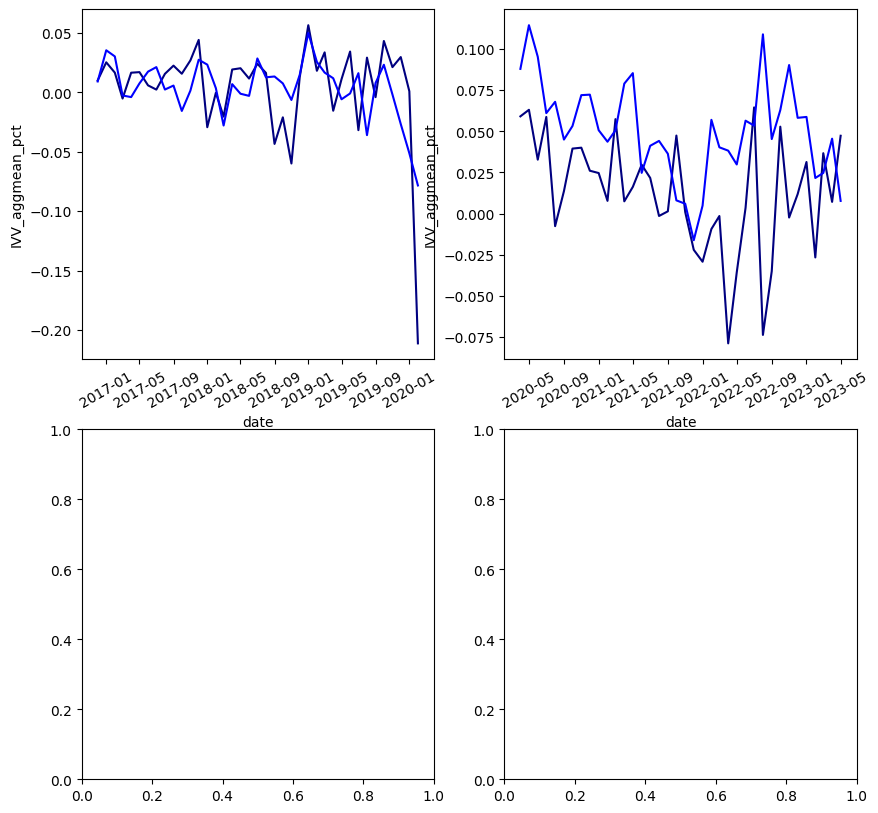

In [936]:
fig, ax = pyplot.subplots(2, 2, figsize=(10, 10))
seaborn.lineplot(
    x=data_train.index, 
    y=data_train[target],
    color='navy', 
    ax=ax[0, 0]
)
seaborn.lineplot(
    x=data_train.index, 
    y=y_train_hat,
    color='blue', 
    ax=ax[0, 0]
)
seaborn.lineplot(
    x=data_test.index, 
    y=data_test[target],
    color='navy', 
    ax=ax[0, 1]
)
seaborn.lineplot(
    x=data_test.index, 
    y=y_test_hat,
    color='blue', 
    ax=ax[0, 1]
)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=30)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=30)
# ax.set_ylim([30_000, 50_000])
print()

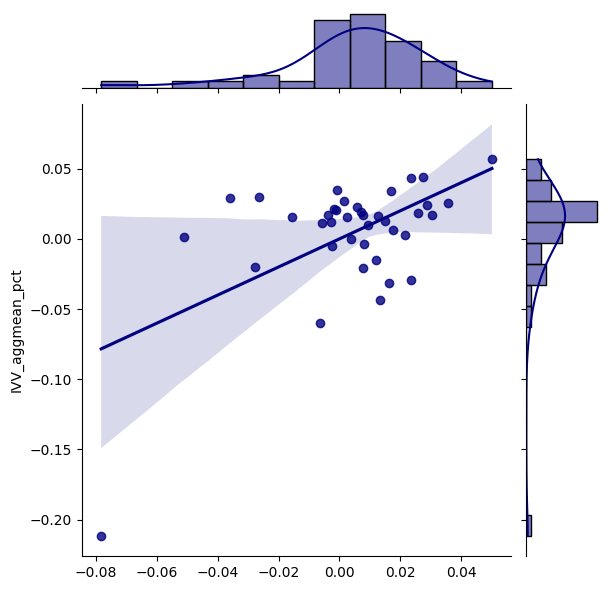

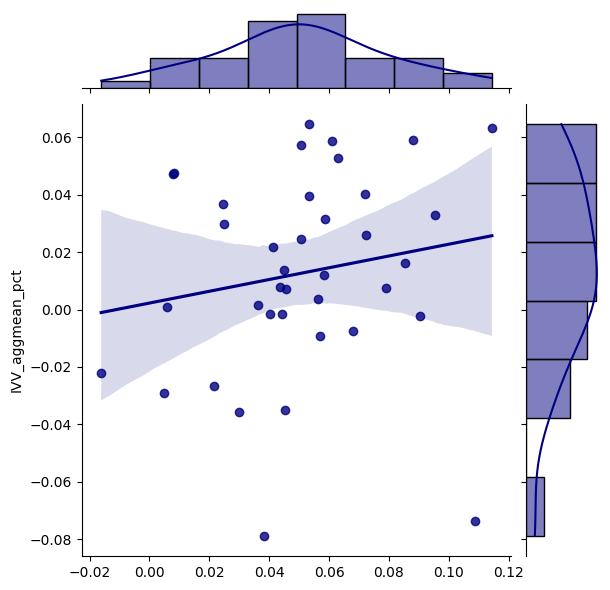

In [937]:
seaborn.jointplot(
    x=y_train_hat, 
    y=data_train[target],
    color='navy', 
    kind='reg',
)
seaborn.jointplot(
    x=y_test_hat, 
    y=data_test[target],
    color='navy', 
    kind='reg',
)
print()

<Axes: xlabel='IVV_aggmean_pct', ylabel='Count'>

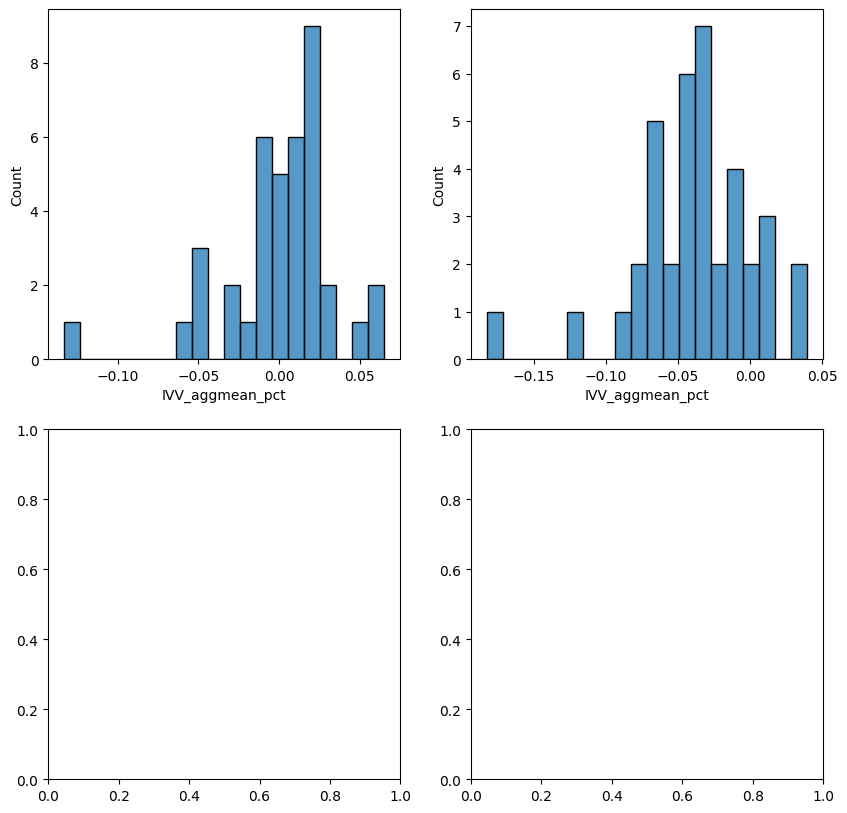

In [938]:
fig, ax = pyplot.subplots(2, 2, figsize=(10, 10))
seaborn.histplot(
    x=e_train,
    bins=20,
    ax=ax[0, 0]
)
seaborn.histplot(
    x=e_test,
    bins=20,
    ax=ax[0, 1]
)